# Supervised Learning with scikit-learn (Linear Regression)

In [223]:
# Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading classes
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate

# Ignoring future warnings for readability reasons
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Linear Regression

Linear regression is one of the simplest methodes for prediction. It is an estimation technique with a closed mathematical solution and aims to minimize the mean squared error and often also called Ordinary Least Squares (OLS). In this example, I apply it on data about advertising expenditure for different channels to predict sales.

In [46]:
# Loading data
sales_df = pd.read_csv("datasets/advertising_and_sales_clean.csv")

# Preview data
sales_df.head()

,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


In [47]:
# Data distribution
sales_df.describe()

,tv,radio,social_media,sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54062.912451,18157.533110,3323.472829,192413.332112
std,26104.941838,9663.259642,2211.253915,93019.873216
min,10000.000000,0.680000,0.030000,31199.410000
25%,32000.000000,10555.355000,1530.822500,112434.610000
50%,53000.000000,17859.515000,3055.565000,188963.680000
75%,77000.000000,25640.605000,4804.922500,272324.240000
max,100000.000000,48871.160000,13981.660000,364079.750000


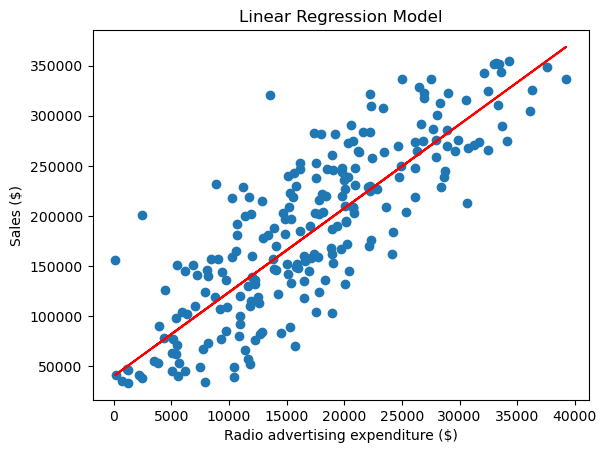

In [208]:
# Defining feature vector X and target vector y
X = sales_df[["radio"]].values
y = sales_df["sales"].values

# Splitting data for validation set approach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

# Model initialization
linreg = LinearRegression()

# Fitting model
linreg.fit(X_train, y_train)

# Predictions
y_pred = linreg.predict(X_test)

# Add a title
plt.title("Linear Regression Model")

# Plot train data and model
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color="red")
plt.xlabel("Radio advertising expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

The model predicts a linear realtionship between Radio advertising budget and Sales. However we see much variation in the data and that the straight line does not fit perfectly the data. To measure  the magnitude of the error, we compute the root mean squared error and the R-squared. The latter is scaled between 0 and 1, the larger it is, the better fits the model the test data.

In [209]:
# Root MSE (RMSE)
print(mean_squared_error(y_test, y_pred, squared=False))

# R-squared
print(r2_score(y_test, y_pred))

47536.47207599962
0.6826480993996746


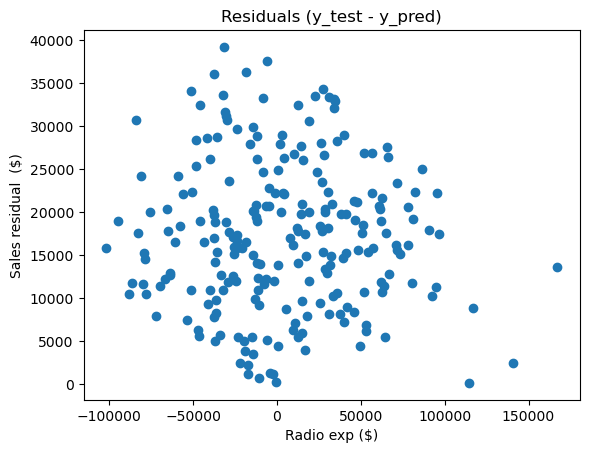

In [214]:
# Plotting redisudials
residuals = y_test - y_pred

plt.title("Residuals (y_test - y_pred)")
plt.scatter(residuals, X_test)

plt.xlabel("Radio exp ($)")
plt.ylabel("Sales residual  ($)")

plt.show()

# Multiple Linear Regression

Multiple linear regression fits a model while compiting k+1 coefficients (for k features) and uses variability of all features to predict the independent variable. In the following example, I add one additional feature to the analysis: TV advertising expenditure.

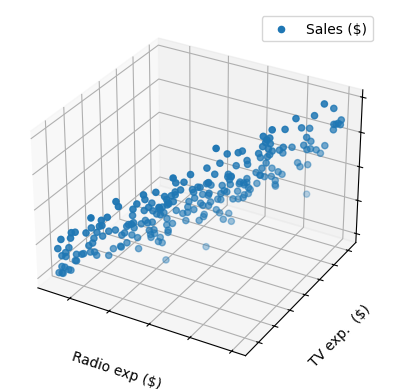

In [215]:
# Defining feature vector X and target vector y
X = sales_df.drop(["sales", "influencer", "social_media"], axis = 1).values
y = sales_df["sales"].values

# Splitting data for validation set approach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X_test[:,0], y_test, X_test[:,1], label='Sales ($)')

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])
ax.legend()

plt.xlabel("Radio exp ($)")
plt.ylabel("TV exp.  ($)")

plt.show()

In [216]:
# Model initialization
linreg = LinearRegression()

# Fitting model
linreg.fit(X_train, y_train)

# Predictions
y_pred = linreg.predict(X_test)

In [217]:
# Root MSE (RMSE)
print(mean_squared_error(y_test, y_pred, squared=False))

# R-squared
print(r2_score(y_test, y_pred))

3104.1968308011324
0.9986467260832199


Lastly, I add a third feature to the analysis to see if there is an imporvement of the goodness if fit and a reduction in RMSE. It seems that adding the social media expüenditure does not improve the model, it even worsens the RMSE slightly.

In [218]:
# Defining feature vector X and target vector y
X = sales_df.drop(["sales", "influencer"], axis = 1).values
y = sales_df["sales"].values

# Splitting data for validation set approach
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 42)

# Model initialization
linreg = LinearRegression()

# Fitting model
linreg.fit(X_train, y_train)

# Predictions
y_pred = linreg.predict(X_test)

# Root MSE (RMSE)
print(mean_squared_error(y_test, y_pred, squared=False))

# R-squared
print(r2_score(y_test, y_pred))

3105.301473744717
0.9986457627741611


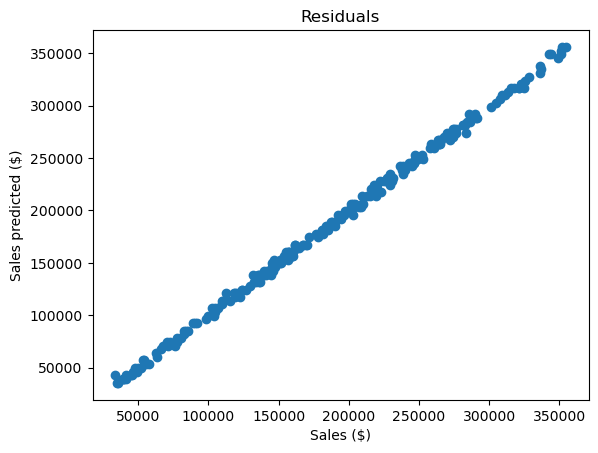

In [222]:
# Plotting 
plt.title("Residuals")
plt.scatter(y_test, y_pred)

plt.xlabel("Sales ($)")
plt.ylabel("Sales predicted ($)")

plt.show()

# k-fold cross validation apporach

So far I used a training and test dataset to fit the model. To be sure, that the extremly high goodness of fit of the model is not due to some flaw in the splitting strategy, I validate the results using a k-fold cross validation strategy. Thus, I split the dataset in 5 folds and estimate the model by excluding one fold at a time for validation.

In [202]:
# Defining k-fold
kf = KFold(n_splits = 5, random_state = 42, shuffle=True)

linreg = LinearRegression()

linreg_cv = cross_val_score(linreg, X, y, cv = kf)

print("Mean R2: {}".format(np.mean(linreg_cv)))
print("Max R2: {}".format(max(linreg_cv)))
print("Min R2: {}".format(min(linreg_cv)))

Mean R2: 0.9989926202782721
Max R2: 0.9990333933862418
Min R2: 0.9989324705699116
